The aim of this project is to analyse whether we can use data about methylation frequency to predict whether a person will get acute myeloid leaukemia (AML).  

We are looking at 23 donors who go on to develop AML in the next two years, and matched control. We have data for around 2500 informative differentially methylated regions (DMRs) (defined in previous work).

We also have data on age and smoking status, so will also query whether the DMRs allow prediction of these factors (as there is a correlation between methylation and each of these).

1- Read in dataframe with information about methylation at 2640 informative regions - rows are donors, 23 cases and 23 controls. Also have information on age and smoking status (as well as case-control status)

In [1]:
import pandas as pd
df = pd.read_csv('221018_whole_genome_DMRs', index_col=0)

In [3]:
df.head(3)

2- Understand distributions of age and smoking status

In [18]:
df_characteristics=df[['Age','Smoking_status','Case_control_status']]

df_characteristics.hist()

In [12]:
df_characteristics.describe()

In [17]:
df_characteristics['Smoking_status'].value_counts(dropna=False)

In [ ]:
# All donors are aged between 50 and 80, with the most common bracket being 65-70. 
# For smoking status, we only have information for 34 of the 46 donors, of which 19 did not smoke, and 15 did smoke

2.1- Look at smoking as a function of case/control status

In [19]:
smoking_by_status=df_characteristics.groupby('Case_control_status')['Smoking_status'].value_counts(dropna=False)

In [20]:
smoking_by_status

In [ ]:
# Within case group 2/3 of donors for which we have information smoke
# Within control group, approximately 1/4 smoke

3- Get an idea of correlations across DMRs

In [ ]:
# dataframe is too large to make plot from, so filter randomly down to 100 DMRs (do a few times)

In [7]:
import random
random_col_nos = random.sample(range(1, 2640), 100)

In [8]:
print (len(random_col_nos))

In [9]:
cols=[]
for c in random_col_nos:
    col='DMR '+str(c)
    cols.append(col)
    
df_short=df[cols]

In [10]:
import seaborn as sns
sns.heatmap(df_short.corr(), cmap='coolwarm', square=True);

In [ ]:
# In general, few very strong correlations - will leave all in for prediction model

4- Filter out DMRs which are not covered in all donors (value=NaN for one or more row) for following analyses

In [2]:
df_high_coverage=df.dropna(axis=1)

In [3]:
df_high_coverage.head(2)

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2631,DMR 2633,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Age,Case_control_status
0,0.401564,0.758967,0.954348,0.363624,0.432317,0.326701,0.821014,0.121339,0.552083,0.404688,...,0.969892,0.065738,0.931159,0.315315,0.305660,0.369048,0.183403,0.041667,80.13,Case
1,0.068567,0.196062,0.668301,0.053066,0.071273,0.048466,0.024194,0.009434,0.141934,0.076239,...,0.852041,0.053608,0.550000,0.046875,0.215986,0.156746,0.296875,0.052632,69.33,Case


In [4]:
df.head(2)

In [ ]:
# Lose approximately 18% of regions, but this is still over 2000 DMRs

5- Do DMRs predict age? 

In [ ]:
# NB: this is not something we expect to be the case for this data, but not impossible for it to happen

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

dmr_cols=[]
for c in df_high_coverage.columns:
    if c.startswith('DMR'):
        dmr_cols.append(c)

x=df_high_coverage[dmr_cols]
y=df_high_coverage['Age']
y=np.array(y)
y.reshape((len(y),1))
model = LinearRegression()
pred_model=model.fit(x,y)
y_pred = model.predict(x)
error=mean_squared_error(y, y_pred)

In [9]:
print (error)

In [10]:
print(f"Weight for single feature x: {model.coef_}\n")
print(f"Bias term for model: {model.intercept_}\n")
print(f"R2 score for model: {model.score(x, y)}\n")

In [11]:
# What if do on subset of data?

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = LinearRegression()
pred_model=model.fit(x_train,y_train)

In [24]:
model.score(x_test,y_test)

In [ ]:
# much weaker link when look at it this way, so can conclude that cannot get a good estimate of age from DMRs
# Also - get very different values when run multiple times, further suggesting this (likely driven by how small the dataset is)

6 - Do DMRs predict smoking status?

In [ ]:
# First, must remove people for which do not have smoking data (and then remove regions for which don't have data for all donors)

In [4]:
df.head()

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2634,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Age,Smoking_status,Case_control_status
0,0.401564,0.758967,0.954348,0.363624,0.432317,0.326701,0.821014,0.121339,0.552083,0.404688,...,0.237500,0.931159,0.315315,0.305660,0.369048,0.183403,0.041667,80.13,Y,Case
1,0.068567,0.196062,0.668301,0.053066,0.071273,0.048466,0.024194,0.009434,0.141934,0.076239,...,0.000000,0.550000,0.046875,0.215986,0.156746,0.296875,0.052632,69.33,N,Case
2,0.083163,0.276989,0.467270,0.062500,0.034416,0.074650,0.022973,0.035185,0.102621,0.091151,...,0.071429,0.875000,0.152252,0.144186,0.181746,0.431034,0.036508,71.09,Y,Case
3,0.427778,0.816327,0.959115,0.265112,0.414634,0.254321,0.750000,0.490991,0.255848,0.261905,...,NaN,0.880952,0.000000,0.242754,0.515152,0.657143,0.134921,68.11,Y,Case
4,0.092773,0.171744,0.754745,0.096928,0.044677,0.163602,0.295455,0.283198,0.172790,0.191279,...,0.026667,0.884615,0.014706,0.359748,0.169872,0.359524,0.097561,65.53,N,Case


In [34]:
df_smoking=df = df[df['Smoking_status'].notna()]

In [10]:
df_smoking.head()

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2634,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Age,Smoking_status,Case_control_status
0,0.401564,0.758967,0.954348,0.363624,0.432317,0.326701,0.821014,0.121339,0.552083,0.404688,...,0.237500,0.931159,0.315315,0.305660,0.369048,0.183403,0.041667,80.13,Y,Case
1,0.068567,0.196062,0.668301,0.053066,0.071273,0.048466,0.024194,0.009434,0.141934,0.076239,...,0.000000,0.550000,0.046875,0.215986,0.156746,0.296875,0.052632,69.33,N,Case
2,0.083163,0.276989,0.467270,0.062500,0.034416,0.074650,0.022973,0.035185,0.102621,0.091151,...,0.071429,0.875000,0.152252,0.144186,0.181746,0.431034,0.036508,71.09,Y,Case
3,0.427778,0.816327,0.959115,0.265112,0.414634,0.254321,0.750000,0.490991,0.255848,0.261905,...,NaN,0.880952,0.000000,0.242754,0.515152,0.657143,0.134921,68.11,Y,Case
4,0.092773,0.171744,0.754745,0.096928,0.044677,0.163602,0.295455,0.283198,0.172790,0.191279,...,0.026667,0.884615,0.014706,0.359748,0.169872,0.359524,0.097561,65.53,N,Case


In [35]:
df_smoking_high_cov=df_smoking.dropna(axis=1)

In [44]:
df_smoking_high_cov.head()

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2633,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Age,Smoking_status,Case_control_status
0,0.401564,0.758967,0.954348,0.363624,0.432317,0.326701,0.821014,0.121339,0.552083,0.404688,...,0.065738,0.931159,0.315315,0.305660,0.369048,0.183403,0.041667,80.13,Y,Case
1,0.068567,0.196062,0.668301,0.053066,0.071273,0.048466,0.024194,0.009434,0.141934,0.076239,...,0.053608,0.550000,0.046875,0.215986,0.156746,0.296875,0.052632,69.33,N,Case
2,0.083163,0.276989,0.467270,0.062500,0.034416,0.074650,0.022973,0.035185,0.102621,0.091151,...,0.030039,0.875000,0.152252,0.144186,0.181746,0.431034,0.036508,71.09,Y,Case
3,0.427778,0.816327,0.959115,0.265112,0.414634,0.254321,0.750000,0.490991,0.255848,0.261905,...,0.029412,0.880952,0.000000,0.242754,0.515152,0.657143,0.134921,68.11,Y,Case
4,0.092773,0.171744,0.754745,0.096928,0.044677,0.163602,0.295455,0.283198,0.172790,0.191279,...,0.050388,0.884615,0.014706,0.359748,0.169872,0.359524,0.097561,65.53,N,Case


In [36]:
# Turn smoking status from yes/no into 1/0
from pandas import get_dummies
df_smoking_high_cov=get_dummies(data=df_smoking_high_cov, columns=['Smoking_status'],drop_first=True)

In [37]:
df_smoking_high_cov.rename({'Smoking_status_Y':'Smoking_status'},axis=1,inplace=True)

In [38]:
# drop columns not currently interested in (age,case_control_status)
df_smoking_high_cov.drop(['Age','Case_control_status'],axis=1,inplace=True)

In [39]:
# scale 
df_smoking_high_cov_scaled=df_smoking_high_cov.copy()
df_smoking_high_cov_scaled=(df_smoking_high_cov_scaled - df_smoking_high_cov_scaled.min()) / (df_smoking_high_cov_scaled.max() - df_smoking_high_cov_scaled.min())

In [40]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()

dmr_cols=[]
for c in df_smoking_high_cov.columns:
    if c.startswith('DMR'):
        dmr_cols.append(c)

x=df_smoking_high_cov[dmr_cols]
y=df_smoking_high_cov['Smoking_status']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = LogisticRegression()
pred_model=model.fit(x_train,y_train)

In [42]:
pred_model.score(x_test,y_test)

0.7272727272727273

In [43]:
# Seems to give relatively high scores 
# how much is model driven by training vs. test sets (as small dataframe)?

In [44]:
model_scores=[]
for i in range(100):
    from sklearn.model_selection import train_test_split
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
    model = LogisticRegression()
    pred_model=model.fit(x_train,y_train)
    score=pred_model.score(x_test,y_test)
    model_scores.append(score)

<AxesSubplot:ylabel='Count'>

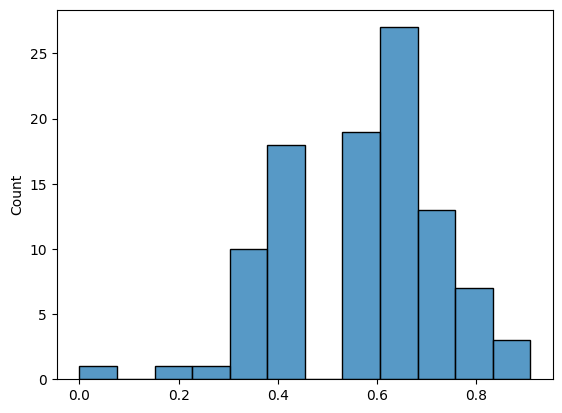

In [45]:
import seaborn as sns
sns.histplot(model_scores)

In [63]:
# The results are clearly affected by the test/training breakdown: the model actually tends to give relatively high accuracy scores more often than not, but in a significant subset of runs, the model performs worse than chance (50%).
# I.e. can sometimes use DMRs to predict smoking status, but in the "real world" would probably want higher accuracy, more consistently
# NB: this is really a very small dataset, especially as multiple people did not have smoking status known (see above)
# Would get a better idea with more data

7- Can DMRs predict case/control status?

In [46]:
df_high_coverage=df.dropna(axis=1)

In [47]:
# Turn smoking status from yes/no into 1/0
from pandas import get_dummies
df_status_high_cov=get_dummies(data=df_high_coverage, columns=['Case_control_status'],drop_first=True)

In [48]:
df_status_high_cov.head(2)

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2633,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Age,Smoking_status,Case_control_status_Control
0,0.401564,0.758967,0.954348,0.363624,0.432317,0.326701,0.821014,0.121339,0.552083,0.404688,...,0.065738,0.931159,0.315315,0.305660,0.369048,0.183403,0.041667,80.13,Y,0
1,0.068567,0.196062,0.668301,0.053066,0.071273,0.048466,0.024194,0.009434,0.141934,0.076239,...,0.053608,0.550000,0.046875,0.215986,0.156746,0.296875,0.052632,69.33,N,0


In [49]:
# drop columns not currently interested in (age,case_control_status)
df_status_high_cov.drop(['Age','Smoking_status'],axis=1,inplace=True)

In [50]:
# scale 
df_status_high_cov_scaled=df_status_high_cov.copy()
df_status_high_cov_scaled=(df_status_high_cov_scaled - df_status_high_cov_scaled.min()) / (df_status_high_cov_scaled.max() - df_status_high_cov_scaled.min())

In [54]:
df_status_high_cov_scaled.head(2)

,DMR 1,DMR 2,DMR 3,DMR 4,DMR 5,DMR 6,DMR 7,DMR 8,DMR 9,DMR 10,...,DMR 2629,DMR 2631,DMR 2633,DMR 2635,DMR 2636,DMR 2637,DMR 2638,DMR 2639,DMR 2640,Case_control_status_Control
0,0.932429,0.919830,0.993188,0.480389,0.962183,0.790221,0.870333,0.247130,1.000000,1.000000,...,0.766193,0.953724,0.217533,0.847021,0.945946,0.735700,0.576389,0.230952,0.090498,0.0
1,0.074054,0.133061,0.584389,0.042761,0.135374,0.077150,0.025647,0.019214,0.112135,0.106399,...,0.136364,0.471434,0.168252,0.000000,0.140625,0.501405,0.204861,0.373843,0.132174,0.0


In [64]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()

dmr_cols=[]
for c in df_status_high_cov_scaled.columns:
    if c.startswith('DMR'):
        dmr_cols.append(c)

x=df_status_high_cov_scaled[dmr_cols]
y=df_status_high_cov_scaled['Case_control_status_Control']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = LogisticRegression()
pred_model=model.fit(x_train,y_train)

In [66]:
pred_model.score(x_test,y_test)

0.6363636363636364

In [67]:
model_scores=[]
for i in range(100):
    from sklearn.model_selection import train_test_split
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
    model = LogisticRegression()
    pred_model=model.fit(x_train,y_train)
    score=pred_model.score(x_test,y_test)
    model_scores.append(score)

<AxesSubplot:ylabel='Count'>

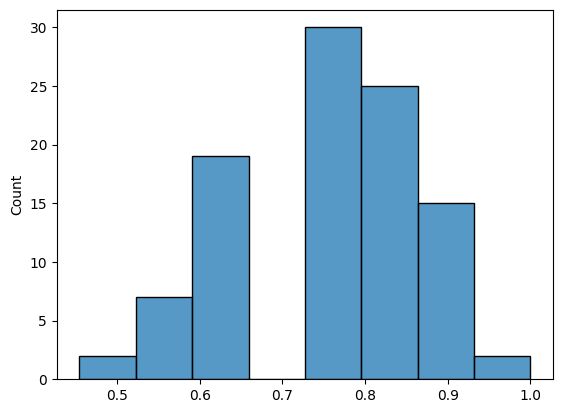

In [68]:
import seaborn as sns
sns.histplot(model_scores)

In [ ]:
# In 100 ran, almost always got an accuracy score of above 50%, with most around the 80% mark.
# Especially considering that our data is limited, this is very encouraging.
# Think it is likely that can use the DMRs included in this dataset for prediction of AML case/control status in unseen samples
# Future work: Narrow down regions which give best prediction and generate more data